

## Exploratory Data Analysis и линейная регрессия

### 5 баллов 
Дедлайн- 5.10

Задание -
Выделить полезные признаки и построить регрессионную модель

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Установить. (Работает только локально  в Jupyter.)

In [107]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

sns.set(style="darkgrid")

## 1) Подготовка данных

**Задание 1**. Выборка- данные из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [109]:
data = pd.read_csv("sample_submission.csv")

In [110]:
y = pd.DataFrame(pd.read_csv("sample_submission.csv"))
test = pd.DataFrame(pd.read_csv("test.csv"))
train = pd.DataFrame(pd.read_csv("train.csv"))

In [111]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Столбцы `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` были добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Преобразуйте даты в `datetime`-объекты

In [112]:
del(train["dropoff_datetime"])

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB


In [114]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
train["pickup_datetime"] = train["pickup_datetime"].apply(lambda x: dt.timestamp(x)) 

In [115]:
train["store_and_fwd_flag"].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [116]:
train = pd.get_dummies(train, columns=["store_and_fwd_flag"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458644 non-null  object 
 1   vendor_id             1458644 non-null  int64  
 2   pickup_datetime       1458644 non-null  float64
 3   passenger_count       1458644 non-null  int64  
 4   pickup_longitude      1458644 non-null  float64
 5   pickup_latitude       1458644 non-null  float64
 6   dropoff_longitude     1458644 non-null  float64
 7   dropoff_latitude      1458644 non-null  float64
 8   trip_duration         1458644 non-null  int64  
 9   store_and_fwd_flag_N  1458644 non-null  uint8  
 10  store_and_fwd_flag_Y  1458644 non-null  uint8  
dtypes: float64(5), int64(3), object(1), uint8(2)
memory usage: 102.9+ MB


Целевое значение -`trip_duration`. Разбейте выборку на обучающую и тестовую в отношении 70% на 30%

In [117]:
y = train["trip_duration"]
ids = train["id"]

In [118]:
del(train["id"])

In [119]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.7)

In [268]:
def split_data(data, test_size):
    return train_test_split(data.drop("trip_duration", axis=1), data["trip_duration"], test_size=test_size, shuffle=False, stratify=None)

Постройте распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

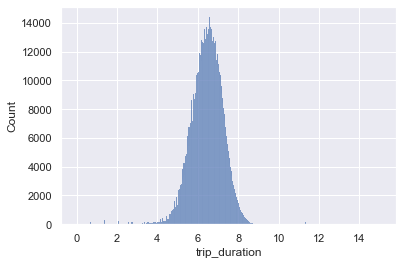

In [120]:
sns.histplot(np.log(y))

[Текст ссылки](https://)**Сделайте вывод**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?


**Задание**Постройте модель с оптимизациеЙ MAE

:

In [121]:
!pip install xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [123]:
scaler = MinMaxScaler().fit(train)
scaled_X = scaler.transform(train)

In [124]:
target_scaler = MinMaxScaler().fit(pd.DataFrame(y))
scaled_target = target_scaler.transform(pd.DataFrame(y))

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, scaled_target, test_size=0.7, random_state=0)

Model = LinearRegression()

Model.fit(X_train, y_train)

y_train_prediction = Model.predict(X_train)
y_test_prediction = Model.predict(X_test)

In [126]:
from sklearn.metrics import mean_absolute_error

print('MSE train: {:.3f}'.format(mean_absolute_error(y_train_prediction, y_train)))
print('MSE test: {:.3f}'.format(mean_absolute_error(y_test_prediction, y_test)))

MSE train: 0.000
MSE test: 0.000


**Сделайте выводы **

## 2.  `pickup_datetime` 

**Задание **. Посмотрите, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [127]:
pick = pd.DataFrame(pd.read_csv("train.csv"))
pick = pd.to_datetime(pick["pickup_datetime"], format='%Y-%m-%d')
pick = pick.dt.normalize()
print(pick)

0         2016-03-14
1         2016-06-12
2         2016-01-19
3         2016-04-06
4         2016-03-26
             ...    
1458639   2016-04-08
1458640   2016-01-10
1458641   2016-04-22
1458642   2016-01-05
1458643   2016-04-05
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]


<AxesSubplot:xlabel='pickup_datetime', ylabel='count'>

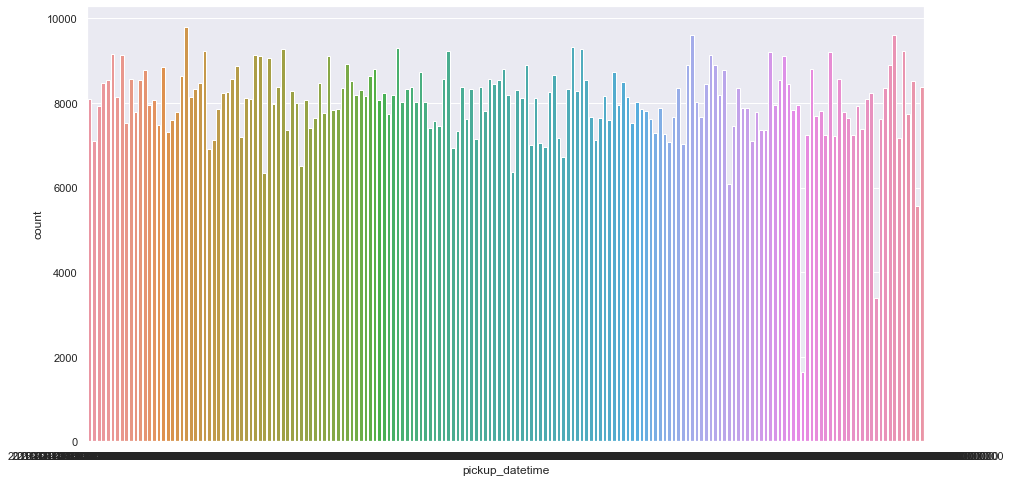

In [128]:
plt.figure(figsize=(15,8))
sns.countplot(x=pick)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [129]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [130]:
d = {}

for date in pick:
    if(date not in d): d[date] = 1
    else: d[date] = d[date] + 1
        
take(2, dict(sorted(d.items(), key=lambda item: item[1])))

[Timestamp('2016-01-23 00:00:00'), Timestamp('2016-01-24 00:00:00')]

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [131]:
pick = pd.DataFrame(pd.read_csv("train.csv"))
pick = pd.to_datetime(pick["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
pick             

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [132]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

In [133]:
time_data = pd.DataFrame(data={'date': pick, 'day':pick.apply(lambda x: weekDays[x.weekday()])})

In [134]:
time_data["hour"] = time_data["date"].apply(lambda x: x.hour)

In [135]:
time_data.head()

,date,day,hour
0,2016-03-14 17:24:55,Monday,17
1,2016-06-12 00:43:35,Sunday,0
2,2016-01-19 11:35:24,Tuesday,11
3,2016-04-06 19:32:31,Wednesday,19
4,2016-03-26 13:30:55,Saturday,13


<AxesSubplot:xlabel='day', ylabel='count'>

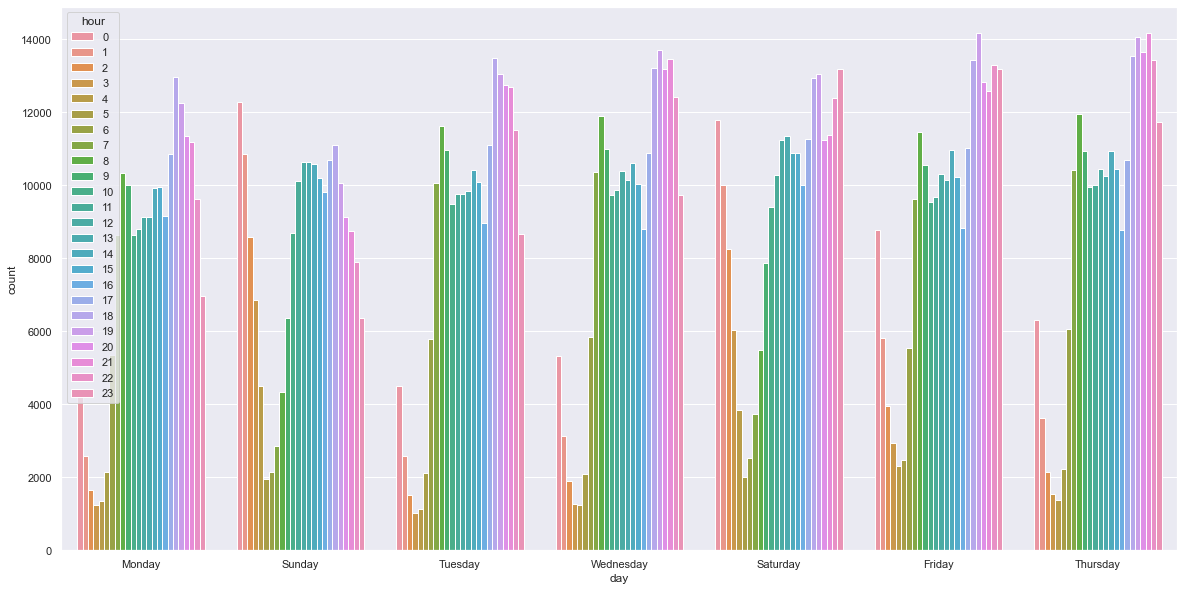

In [136]:
plt.figure(figsize=(20,10))
sns.countplot(x="day", hue="hour", data=time_data)

**Задание**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [137]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
time_data["month"] = time_data["date"].apply(lambda x: months[x.month])

In [138]:
time_data.head()

,date,day,hour,month
0,2016-03-14 17:24:55,Monday,17,Apr
1,2016-06-12 00:43:35,Sunday,0,Jul
2,2016-01-19 11:35:24,Tuesday,11,Feb
3,2016-04-06 19:32:31,Wednesday,19,May
4,2016-03-26 13:30:55,Saturday,13,Apr


<Figure size 1440x720 with 0 Axes>

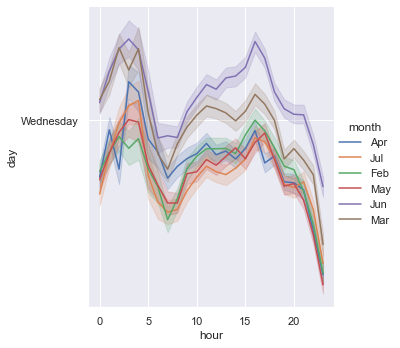

In [139]:
plt.figure(figsize=(20,10))
sns.relplot(x='hour', y='day', hue="month", kind='line', data=time_data)

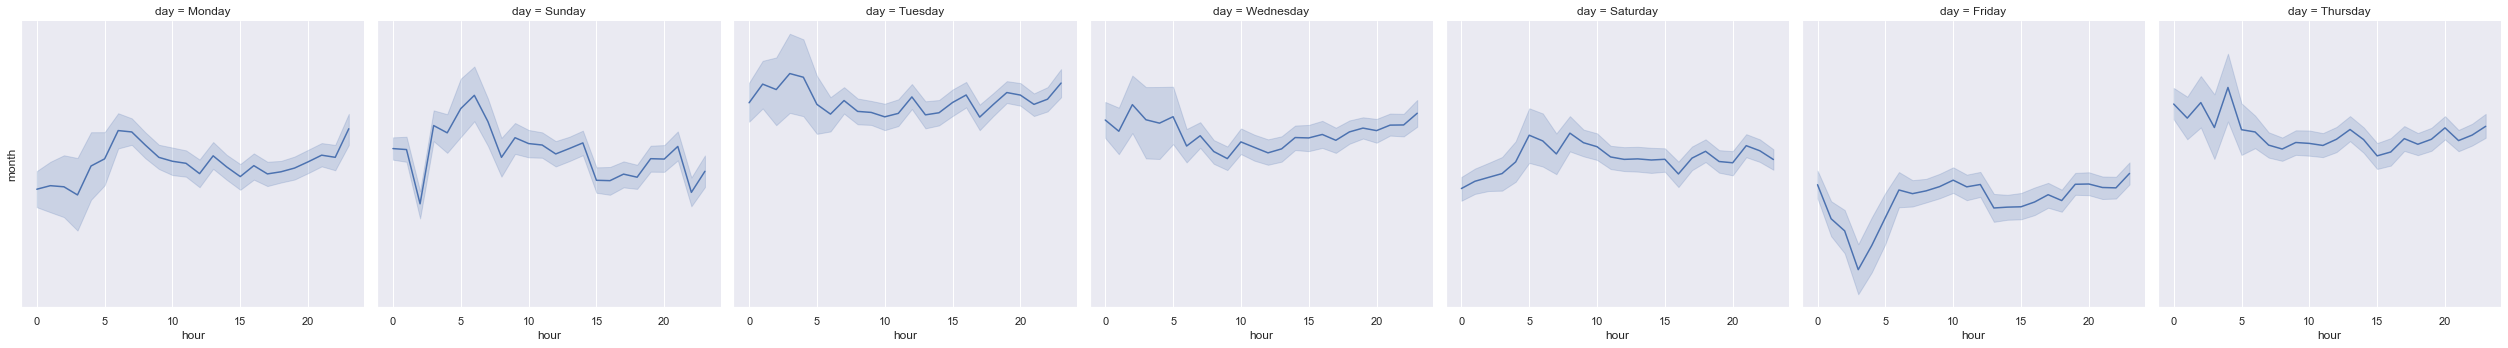

In [140]:
sns.relplot(data=time_data, x="hour", y="month", col="day", kind="line")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание **. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [141]:
from math import log

In [142]:
dep = train.copy()
dep["log_dur"] = dep["trip_duration"].apply(lambda x: log(x))

In [143]:
dep["pickup_datetime"] = pd.to_datetime(pick, format='%Y-%m-%d %H:%M:%S')
dep["dow"] = dep["pickup_datetime"].apply(lambda x: weekDays[x.dayofweek])

In [144]:
dow_dur_gr = dep.groupby(["dow"])["log_dur"].mean().to_frame("mean") 

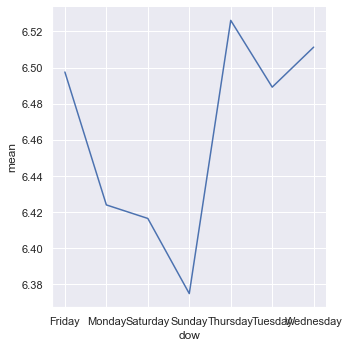

In [145]:
# График зависимости среднего логарифма времени поездки от дня недели
sns.relplot(data=dow_dur_gr, x="dow", y="mean", kind="line")

In [146]:
dep["hod"] = dep["pickup_datetime"].apply(lambda x: x.hour)
hod_dur_gr = dep.groupby(["hod"])["log_dur"].mean().to_frame("mean") 

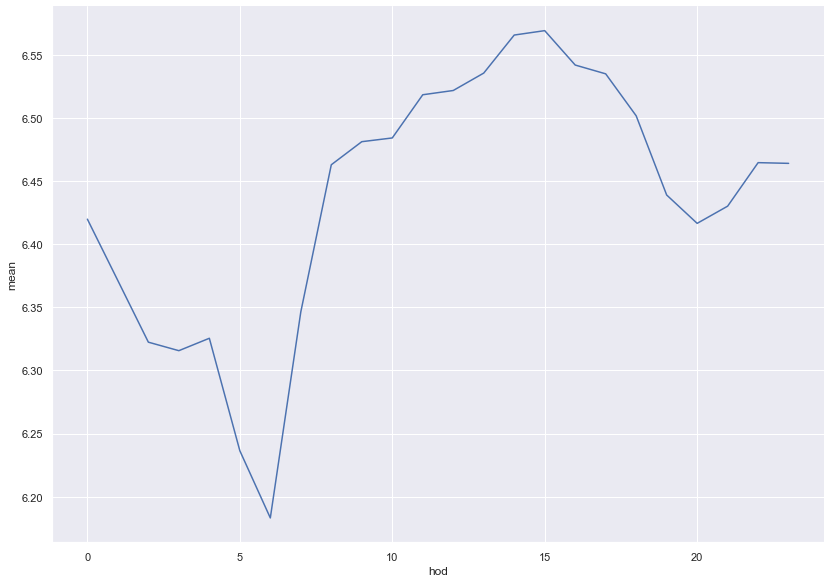

In [147]:
# То же самое, но для часа в сутках
sns.relplot(data=hod_dur_gr, x="hod", y="mean", kind="line", height=8.27, aspect=11.7/8.27)

In [148]:
dep["doy"] = dep["pickup_datetime"].apply(lambda x: x.dayofyear)
hod_dur_gr = dep.groupby(["doy"])["log_dur"].mean().to_frame("mean") 

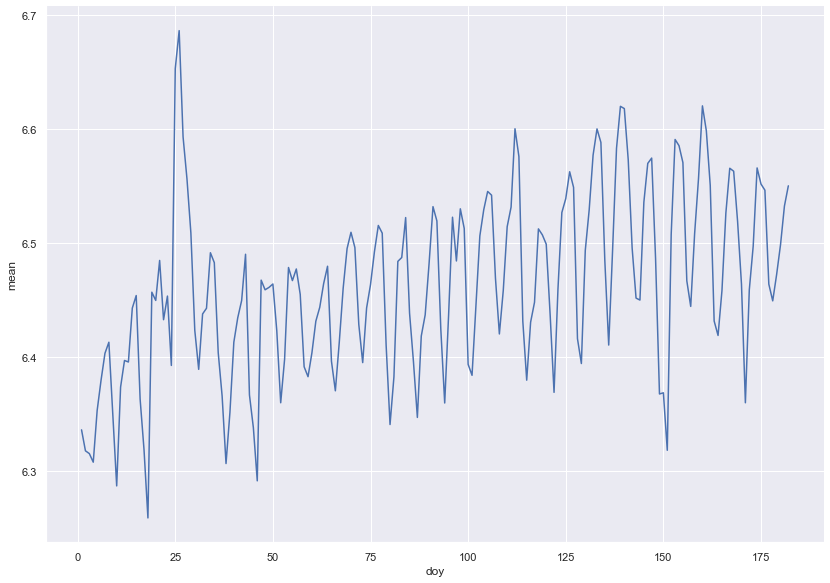

In [149]:
# То же самое, но для дня в году
sns.relplot(data=hod_dur_gr, x="doy", y="mean", kind="line", height=8.27, aspect=11.7/8.27)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [154]:
train["dow"] = dep["pickup_datetime"].apply(lambda x: x.dayofweek)
train["month"] = dep["pickup_datetime"].apply(lambda x: x.month) 
train["hour"] = dep["pickup_datetime"].apply(lambda x: x.hour) 
train["doy"] = dep["pickup_datetime"].apply(lambda x: x.dayofyear) 

train["anomaly"] = train["doy"].apply(lambda x: 1 if x in [23, 24] else 0)



**Отвеьте письменно на Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [262]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [276]:
from sklearn.metrics import mean_squared_error

In [263]:
def scale_and_one_hot_encode(data, target="trip_duration"):
    numeric_data = data._get_numeric_data().drop(target, axis=1)
    target = data[target].copy()
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    cat_data = data.select_dtypes(["category"])
    
    encoder = OneHotEncoder(sparse=False)
    encoded_data = encoder.fit_transform(cat_data)
    
    scaled_data_df = pd.DataFrame(data=scaled_data, index=data.index, columns=numeric_data.columns)
    one_hot_encoded_df = pd.DataFrame(encoded_data, index=data.index)
    
    return pd.concat([scaled_data_df, one_hot_encoded_df, target], axis=1)

In [264]:
def scale(data, target="trip_duration"):
    numeric_data = data._get_numeric_data().drop(target, axis=1)
    target = data[target].copy()
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    cat_data = data.select_dtypes(["category"])
    scaled_data_df = pd.DataFrame(scaled_data, index=data.index, columns=numeric_data.columns)
    
    return pd.concat([scaled_data_df, cat_data, target], axis=1)

In [265]:
def one_hot_encode(data, target="trip_duration"):
    numeric_data = data._get_numeric_data().drop(target, axis=1)
    cat_data = data.select_dtypes(["category"])
    
    encoder = OneHotEncoder(sparse=False)
    encoded_data = encoder.fit_transform(cat_data)
    
    one_hot_encoded_df = pd.DataFrame(encoded_data, index=data.index)
    return pd.Concat([numeric_data, one_hot_encoded_df], axis=1)

In [266]:
def split_data_scaled_encoded(data, test_size):
    scaled = scale(data)
    x_train, y_train, x_test, y_test = train_test_split(data.drop("trip_duration", axis=1), data["trip_duration"], test_size=test_size, random_state=42)
    return one_hot_encode(x_train), y_train, one_hot_encode(x_test), y_test

## 3. Изучаем координаты
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [39]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [40]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [155]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.75213671875, -73.97357827758789], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

In [156]:
show_circles_on_map(train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.752733180999755, -73.97458414459228], controls=(ZoomControl(options=['position', 'zoom_in_text'…

**Вопрос**: Какие две точки выделяются на карте?

**Задание**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [158]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians, fabs

In [167]:
def haversine(p_lat, p_lon, d_lat, d_lon):
    return fabs(haversine_distances([[radians(p_lat), radians(p_lon)], [radians(d_lat), radians(d_lon)]])[0, 1] * 6371)

In [168]:
train["haversine"] = train.apply(lambda x: haversine(x["pickup_latitude"], x["pickup_longitude"], x["dropoff_latitude"], x["dropoff_longitude"]), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [175]:
train["log_har"] = train["haversine"].apply(lambda x: log(x + 0.1))

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [176]:
train["log_har"].corr(train["trip_duration"])

0.09665483782735354

**Задание**. Изучите среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<AxesSubplot:>

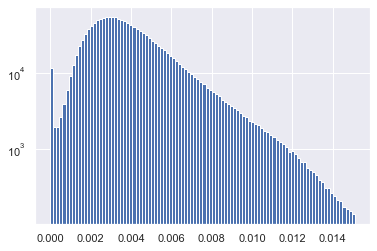

In [197]:
train["m_speed"] = train["haversine"] / train["trip_duration"]
train["m_speed"].hist(bins=100, log=True)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<AxesSubplot:>

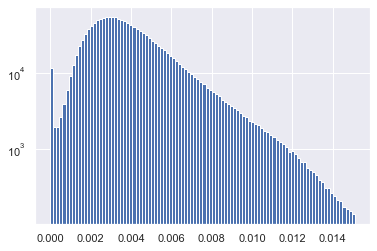

In [178]:
quantile = train["m_speed"].quantile(0.999)
train = train[train["m_speed"] < quantile].copy()
train["m_speed"].hist(bins=100, log=True)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<AxesSubplot:xlabel='dow', ylabel='hour'>

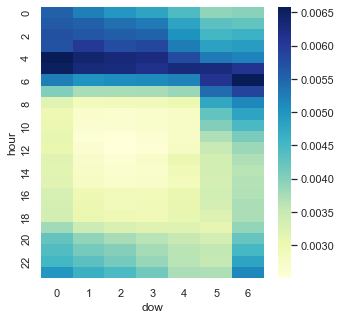

In [198]:
dow_hod_pairs = train.groupby(["dow", "hour"])["m_speed"].median()
heatmap = dow_hod_pairs.unstack(level=0)

plt.subplots(figsize=(5, 5))
sns.heatmap(heatmap, cmap="YlGnBu")

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Напрямую коррелирует с временем поездки

In [199]:
m_speed_temp = train["m_speed"]
train.drop("m_speed", axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [185]:
dow_hod_pairs_frame = dow_hod_pairs.to_frame("median")

In [188]:
lower = dow_hod_pairs_frame["median"].quantile(0.1)
upper = dow_hod_pairs_frame["median"].quantile(0.9)

In [220]:
print(lower)
print(upper)

0.0027129367197458987
0.0057695192426134075


In [223]:
train["bussy_roads"] = train.apply(lambda x: 1 if heatmap.iat[x["hour"].astype('int64'), x["dow"].astype('int64')] < lower else 0, axis=1)
train["free_roads"] = train.apply(lambda x: 1 if heatmap.iat[x["hour"].astype('int64'), x["dow"].astype('int64')] > upper else 0, axis=1)

In [224]:
train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,dow,month,hour,doy,anomaly,haversine,log_har,bussy_roads,free_roads
0,2,1.457965e+09,1,-73.982155,40.767937,-73.964630,40.765602,455,1,0,0,3,17,74,0,1.498521,0.469079,0,0
1,1,1.465681e+09,1,-73.980415,40.738564,-73.999481,40.731152,663,1,0,6,6,0,164,0,1.805507,0.644748,0,0
2,2,1.453193e+09,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,0,1,1,11,19,0,6.385098,1.869507,1,0
3,2,1.459960e+09,1,-74.010040,40.719971,-74.012268,40.706718,429,1,0,2,4,19,97,0,1.485498,0.460899,0,0
4,2,1.458988e+09,1,-73.973053,40.793209,-73.972923,40.782520,435,1,0,5,3,13,86,0,1.188588,0.253547,0,0


**Задание**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [225]:
La_Guardia_lat = 40.77268
La_Guardia_lon = -73.87238

In [226]:
F_Kennedy_lat = 40.64589
F_Kennedy_lon = -73.78695

In [233]:
radius = 1.3

In [232]:
train["from_guardia"] = train.apply(lambda x: 1 if haversine(La_Guardia_lat, La_Guardia_lon, x["pickup_latitude"], x["pickup_longitude"]) < radius else 0, axis = 1)
train["to_guardia"] = train.apply(lambda x: 1 if haversine(La_Guardia_lat, La_Guardia_lon, x["dropoff_latitude"], x["dropoff_longitude"]) < radius else 0, axis = 1)

train["from_kennedy"] = train.apply(lambda x: 1 if haversine(F_Kennedy_lat, F_Kennedy_lon, x["pickup_latitude"], x["pickup_longitude"]) < radius else 0, axis = 1)
train["to_kennedy"] = train.apply(lambda x: 1 if haversine(F_Kennedy_lat, F_Kennedy_lon, x["dropoff_latitude"], x["dropoff_longitude"]) < radius else 0, axis = 1)

In [234]:
train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,...,doy,anomaly,haversine,log_har,bussy_roads,free_roads,from_guardia,to_guardia,from_kennedy,to_kennedy
0,2,1.457965e+09,1,-73.982155,40.767937,-73.964630,40.765602,455,1,0,...,74,0,1.498521,0.469079,0,0,0,0,0,0
1,1,1.465681e+09,1,-73.980415,40.738564,-73.999481,40.731152,663,1,0,...,164,0,1.805507,0.644748,0,0,0,0,0,0
2,2,1.453193e+09,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,0,...,19,0,6.385098,1.869507,1,0,0,0,0,0
3,2,1.459960e+09,1,-74.010040,40.719971,-74.012268,40.706718,429,1,0,...,97,0,1.485498,0.460899,0,0,0,0,0,0
4,2,1.458988e+09,1,-73.973053,40.793209,-73.972923,40.782520,435,1,0,...,86,0,1.188588,0.253547,0,0,0,0,0,0


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [235]:
log_dur = train["trip_duration"].apply(lambda x: log(x))

<AxesSubplot:xlabel='trip_duration'>

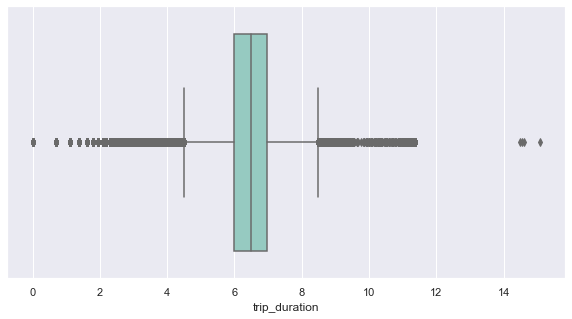

In [244]:
# Час пик от таргета
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train[train["bussy_roads"] == 1], palette="Set3")

<AxesSubplot:xlabel='trip_duration'>

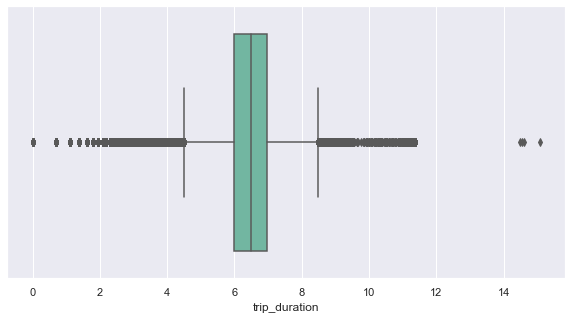

In [245]:
# Не час пик от таргета
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train[train["free_roads"] == 1], palette="Set2")

<AxesSubplot:xlabel='trip_duration'>

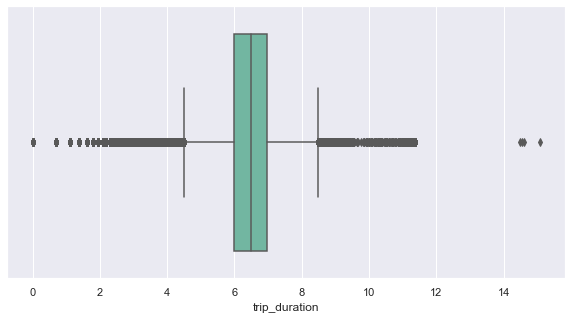

In [250]:
# В Guardia
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train[train["to_guardia"] == 1], palette="Set2")

<AxesSubplot:xlabel='trip_duration'>

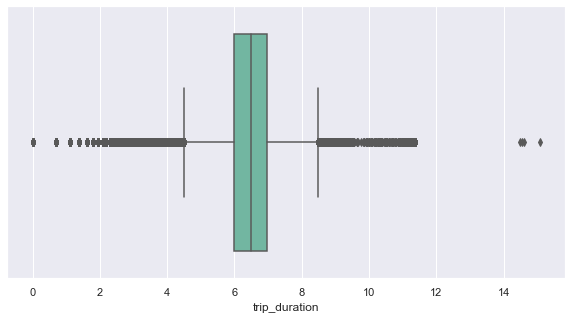

In [251]:
# Из Guardia
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train[train["from_guardia"] == 1], palette="Set2")

<AxesSubplot:xlabel='trip_duration'>

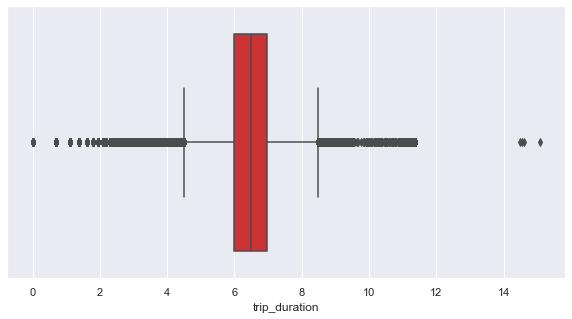

In [252]:
# В Kennedy
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train[train["to_kennedy"] == 1], palette="Set1")

<AxesSubplot:xlabel='trip_duration'>

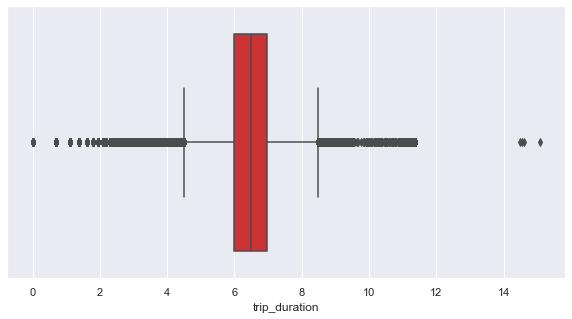

In [254]:
# Из Kennedy
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train[train["from_kennedy"] == 1], palette="Set1")

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        lat_series = pd.concat([X["pickup_latitude"], X["dropoff_latitude"]], axis=0)
        lon_series = pd.concat([X["pickup_longitude"], X["dropoff_longitude"]], axis=0)
        borders_quantile_end = 1 - self.borders_quantile
        
        self.lat_border_start = lat_series.quantile(self.borders_quantile)
        self.lat_border_end = lat_series.quantile(borders_quantile_end)
        
        self.lon_border_start = lon_series.quantile(self.borders_quantile)
        self.lon_border_end = lon_series.quantile(borders_quantile_end)
        
        self.lat_cell_length = (self.lat_border_end - self.lat_border_start) / self.lat_cells_count
        self.lon_cell_length = (self.lon_border_end - self.lon_border_start) / self.lon_cells_count
        
        return self
    
    def transform(self, X, y=None):
        result_data = train.copy()
        
        result_data["pickup_cell"] = -1
        result_data["dropoff_cell"] = -1
        
        valid_pickup_coords = result_data[(result_data["pickup_latitude"] < self.lat_border_end) & (result_data["pickup_latitude"] > self.lat_border_start) & (result_data["pickup_longitude"] < self.lon_border_end) & (result_data["pickup_longitude"] > self.lon_border_start)]
        valid_dropoff_coords = result_data[(result_data["dropoff_latitude"] < self.lat_border_end) & (result_data["dropoff_latitude"] > self.lat_border_start) & (result_data["dropoff_longitude"] < self.lon_border_end) & (result_data["dropoff_longitude"] > self.lon_border_start)]
        
        result_data.loc[valid_pickup_coords.index, "pickup_cell"] = (result_data["pickup_latitude"] - self.lat_border_start) // self.lat_cell_length + (result_data["pickup_latitude"] - self.lat_border_start) // self.lat_cell_length
        result_data.loc[valid_dropoff_coords.index, "dropoff_cell"] = (result_data["dropoff_latitude"] - self.lat_border_start) // self.lat_cell_length + (result_data["dropoff_latitude"] - self.lat_border_start) // self.lat_cell_length
        
        result_data["pickup_cell"] = result_data["pickup_cell"].astype(int).astype("category")
        result_data["dropoff_cell"] = result_data["dropoff_cell"].astype(int).astype("category")
        
        return result_data
    
    def __init__(self, borders_quantile=0.1, lat_cells_count=3, lon_cells_count=4):
        self.lon_cells_count = lon_cells_count
        self.lat_cells_count = lat_cells_count
        self.borders_quantile = borders_quantile
        self.lat_border_start = None
        self.lat_border_end = None
        self.lon_border_start = None
        self.lon_border_end = None
        self.lat_cell_length = None
        self.lon_cell_length = None

In [257]:
mgt = MapGridTransformer()
data = mgt.fit_transform(train)

In [259]:
train.dtypes

vendor_id                 int64
pickup_datetime         float64
passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration             int64
store_and_fwd_flag_N      uint8
store_and_fwd_flag_Y      uint8
dow                       int64
month                     int64
hour                      int64
doy                       int64
anomaly                   int64
haversine               float64
log_har                 float64
bussy_roads               int64
free_roads                int64
from_guardia              int64
to_guardia                int64
from_kennedy              int64
to_kennedy                int64
dtype: object

**Задание 10**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [269]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(data), 0.3) 

In [271]:
from sklearn.linear_model import Ridge

In [274]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=42, solver="auto", tol=0.01)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Ridge(normalize=False, random_state=42, tol=0.01)

In [277]:
print(f"MSE train - {mean_squared_error(y_train, ridge.predict(x_train))}")
print(f"MSE test - {mean_squared_error(y_test, ridge.predict(x_test))}")

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE train - 34595581.34118926
MSE test - 9711280.253077552


## 3. Изучаем оставшиеся признаки (1 балл)

**Задание**. Исследуйте признаки `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [279]:
train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,...,doy,anomaly,haversine,log_har,bussy_roads,free_roads,from_guardia,to_guardia,from_kennedy,to_kennedy
0,2,1.457965e+09,1,-73.982155,40.767937,-73.964630,40.765602,455,1,0,...,74,0,1.498521,0.469079,0,0,0,0,0,0
1,1,1.465681e+09,1,-73.980415,40.738564,-73.999481,40.731152,663,1,0,...,164,0,1.805507,0.644748,0,0,0,0,0,0
2,2,1.453193e+09,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,0,...,19,0,6.385098,1.869507,1,0,0,0,0,0
3,2,1.459960e+09,1,-74.010040,40.719971,-74.012268,40.706718,429,1,0,...,97,0,1.485498,0.460899,0,0,0,0,0,0
4,2,1.458988e+09,1,-73.973053,40.793209,-73.972923,40.782520,435,1,0,...,86,0,1.188588,0.253547,0,0,0,0,0,0


In [280]:
vendors = train["vendor_id"].unique()
passengers = train["passenger_count"].unique()
flag_N = train["store_and_fwd_flag_N"].unique()
flag_Y = train["store_and_fwd_flag_Y"].unique()

In [283]:
print(vendors)
print(passengers)

[2 1]
[1 6 4 2 3 5 0 7 9]


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<AxesSubplot:xlabel='trip_duration'>

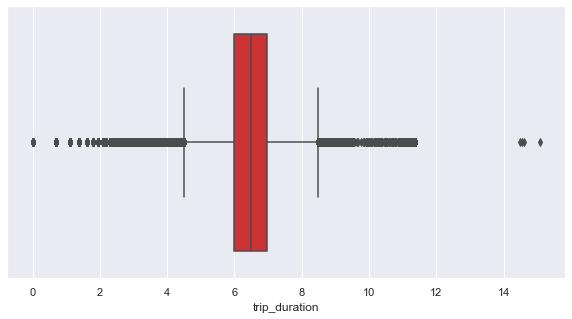

In [282]:
# Vendor id
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train["vendor_id"], palette="Set1")

<AxesSubplot:xlabel='trip_duration'>

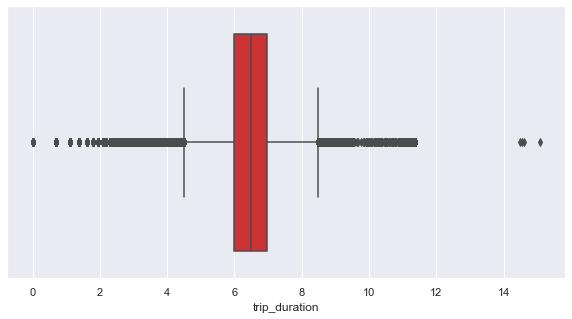

In [284]:
# passengers count
plt.subplots(figsize=(10, 5))
sns.boxplot(x=log_dur, data=train["passenger_count"], palette="Set1")

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [285]:
train_copy = train.copy()

In [286]:
train = pd.get_dummies(train, columns=["vendor_id"])

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [287]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(data), 0.3)

ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=42, solver="auto", tol=0.01)

print(f"MSE train - {mean_squared_error(y_train, ridge.predict(x_train))}")
print(f"MSE test - {mean_squared_error(y_test, ridge.predict(x_test))}")

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE train - 34595581.34118926
MSE test - 9711280.253077552


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

##  4. Улучшаем модель

**Задание 13**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

<AxesSubplot:>

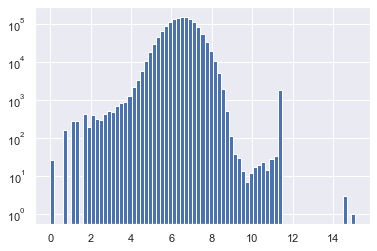

In [295]:
train["log_dur"] = log_dur
train["log_dur"].hist(bins=75, log=True)

In [298]:
train = train[(train["log_dur"] > 0) & (train["log_dur"] < 13)].copy()

<AxesSubplot:>

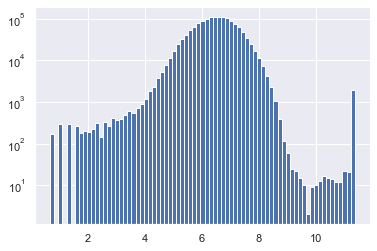

In [299]:
train["log_dur"].hist(bins=75, log=True)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [301]:
# [1 6 4 2 3 5 0 7 9]
def change_count(count):
    if count in [5, 9]: return 4
    else: return count

In [302]:
train["passenger_count"] = train["passenger_count"].apply(lambda x: change_count(x))

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [303]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(data), 0.3)

ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
     normalize=False, random_state=42, solver="auto", tol=0.01)

print(f"MSE train - {mean_squared_error(y_train, ridge.predict(x_train))}")
print(f"MSE test - {mean_squared_error(y_test, ridge.predict(x_test))}")

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE train - 34595581.34118926
MSE test - 9711280.253077552


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [304]:
from sklearn.linear_model import Lasso

In [321]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(train), 0.3)

lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, random_state=42, warm_start=False, tol=0.01)

print(f"MSE train - {mean_squared_error(y_train, lasso.predict(x_train))}")
print(f"MSE test - {mean_squared_error(y_test, lasso.predict(x_test))}")

MSE train - 7816475.626648488
MSE test - 7784328.008014703


Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [307]:
from sklearn.model_selection import GridSearchCV

In [309]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(data), 0.2)
params = {"alpha": np.arange(1, 100,1 )}

In [ ]:
lasso = Lasso()

searcher = GridSearchCV(estimator=lasso, param_grid=params, scoring="neg_mean_squared_error")
searcher.fit(x_train, y_train)
leaders = searcher.best_params_
alpha = leaders["alpha"]

In [313]:
alpha

3

In [320]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(train), 0.3)

lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, random_state=42, warm_start=False, tol=0.01)

print(f"MSE train - {mean_squared_error(y_train, lasso.predict(x_train))}")
print(f"MSE test - {mean_squared_error(y_test, lasso.predict(x_test))}")

MSE train - 7816801.467574514
MSE test - 7782968.308259951


Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

In [317]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [318]:
zeros = np.zeros(100)

for i in np.arange(1, 100, 1):
    lasso = Lasso(alpha=i)
    lasso.fit(x_train, y_train)
    zeros[i-1] = len(list(filter(lambda x: x != 0, lasso.coef_)))

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklea

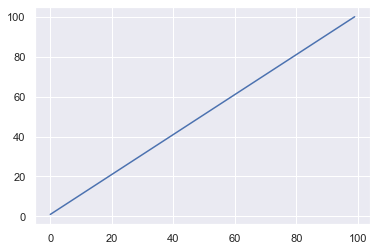

In [319]:
plt.plot(range(1, len(zeros) + 1))

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [322]:
train.dtypes

pickup_datetime         float64
passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration             int64
store_and_fwd_flag_N      uint8
store_and_fwd_flag_Y      uint8
dow                       int64
month                     int64
hour                      int64
doy                       int64
anomaly                   int64
haversine               float64
log_har                 float64
bussy_roads               int64
free_roads                int64
from_guardia              int64
to_guardia                int64
from_kennedy              int64
to_kennedy                int64
vendor_id_1               uint8
vendor_id_2               uint8
log_dur                 float64
dtype: object

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

**Задание 16**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [341]:
train.dtypes

pickup_datetime         float64
passenger_count           int64
pickup_longitude        float64
pickup_latitude         float64
dropoff_longitude       float64
dropoff_latitude        float64
trip_duration             int64
store_and_fwd_flag_N      uint8
store_and_fwd_flag_Y      uint8
dow                       int64
month                     int64
hour                      int64
doy                       int64
anomaly                   int64
haversine               float64
log_har                 float64
bussy_roads               int64
free_roads                int64
from_guardia              int64
to_guardia                int64
from_kennedy              int64
to_kennedy                int64
vendor_id_1               uint8
vendor_id_2               uint8
log_dur                 float64
m_dist                  float64
log_m_dist              float64
dtype: object

In [323]:
from math import sin, cos

lon_km = 110.574
lat_km_coef = 111.320

def manhattan_dist(x1, y1, x2, y2):
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    return lat_km_coef * cos(radians(dx)) + lon_km * dy

In [333]:
train["m_dist"] = train.apply(lambda x: manhattan_dist(x["pickup_latitude"], x["pickup_longitude"], x["dropoff_latitude"], x["dropoff_longitude"]), axis=1)

In [334]:
train["log_m_dist"] = train["m_dist"].apply(lambda x: log(x))

In [343]:
print("Corr btw log_m_dist and log_dur =  ", train["log_m_dist"].corr(train["log_dur"]))
print("Corr btw log_har and log_dur =  ", train["log_m_dist"].corr(train["log_har"]))

Corr btw log_m_dist and log_dur =   0.5387510292632298
Corr btw log_har and log_dur =   0.7147290890583721


# Manhattan`s streets directions

In [344]:
from ipyleaflet import Polyline

In [358]:
mnth_angle_x = radians(117)
mnth_angle_y = radians(37)

In [347]:
def show_directions(color):
    center = (40.74887, -73.96804)
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)
    
    lines = []
    
    lines.append(Polyline(
                locations=((center[0] - 0.1*cos(mnth_angle_x), center[1] -0.1*sin(mnth_angle_x)), (center[0] + 0.1*cos(mnth_angle_x), center[1] + 0.1*sin(mnth_angle_x))),
                 fill_color=color,
                 fill_opacity = 1))
    
    lines.append(Polyline(
                locations=((center[0] - 0.1*cos(mnth_angle_y), center[1] -0.1*sin(mnth_angle_y)), (center[0] + 0.1*cos(mnth_angle_y), center[1] + 0.1*sin(mnth_angle_y))),
                 fill_color=color,
                 fill_opacity = 1))
    
    layer = LayerGroup(layers=lines)
    result_map.add_layer(layer)
    
    return result_map

In [359]:
show_directions("green")

Map(center=[40.74887, -73.96804], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [360]:
x_train, x_test, y_train, y_test = split_data(scale_and_one_hot_encode(train), 0.3)

lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, random_state=42, warm_start=False, tol=0.01)

print(f"MSE train - {mean_squared_error(y_train, lasso.predict(x_train))}")
print(f"MSE test - {mean_squared_error(y_test, lasso.predict(x_test))}")

MSE train - 7814230.435703752
MSE test - 7782701.6758632595
